# <font color='darkred'>**Qurrah**</font>


#1. Data Loading and Initial Exploration:

In [38]:
# IMPORTING
print("Importing.....", end="", flush=True)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
print("[Done]")

Importing.....[Done]


In [39]:

df = pd.read_csv("qurrah_users_2022.csv")
print(f'The data contains {len(df)} rows and {len(df.columns)} columns')
df.head(10)

The data contains 34743 rows and 11 columns


,id,status,startDate,registrationDate,dob,gender,city,region,numberOfChildren,isMarried,hasDisability
0,1,مفعل,2023-05-09 00:00:00,2022-08-31 23:00:46,1997-05-28 00:00:00,1,المسجد,حائل,2,0,0
1,2,مفعل,2023-05-08 00:00:00,2022-02-28 08:21:52,1993-12-15 00:00:00,1,بريدة,القصيم,2,0,0
2,3,مفعل,2023-05-07 00:00:00,2022-12-03 19:47:43,1991-04-07 00:00:00,1,البكيرية,القصيم,3,0,0
3,4,مفعل,2023-05-07 00:00:00,2022-11-20 10:48:03,1996-11-11 00:00:00,1,ينبع الصناعية,المدينة المنورة,1,0,0
4,5,مفعل,2023-05-08 00:00:00,2022-10-17 11:08:29,1988-05-01 00:00:00,1,الرياض,الرياض,2,0,0
5,6,مفعل,2023-05-07 00:00:00,2022-09-28 11:25:44,1999-08-27 00:00:00,1,الدوادمي,حائل,2,1,0
6,7,مفعل,2023-05-09 00:00:00,2022-09-06 19:12:57,1988-10-19 00:00:00,1,الطائف,مكة المكرمة,1,0,0
7,8,مفعل,2023-05-07 00:00:00,2022-09-18 13:59:09,1997-07-07 00:00:00,1,الخبر,المنطقة الشرقية,3,1,0
8,9,مفعل,2023-05-07 00:00:00,2022-10-09 06:12:51,1996-09-24 00:00:00,1,جدة,مكة المكرمة,2,0,0
9,10,مفعل,2023-05-07 00:00:00,2022-07-25 19:54:54,1990-11-10 00:00:00,1,الدوادمي,حائل,4,1,0


#### **Summarize our Data**

In [40]:
df.info() # show the data types for the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34743 entries, 0 to 34742
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                34743 non-null  int64 
 1   status            34743 non-null  object
 2   startDate         34743 non-null  object
 3   registrationDate  34743 non-null  object
 4   dob               34743 non-null  object
 5   gender            34743 non-null  int64 
 6   city              34464 non-null  object
 7   region            34354 non-null  object
 8   numberOfChildren  34743 non-null  int64 
 9   isMarried         34743 non-null  int64 
 10  hasDisability     34743 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 2.9+ MB


In [ ]:
df.shape

(34743, 11)

In [7]:
df.dtypes

id                   int64
status              object
startDate           object
registrationDate    object
dob                 object
gender               int64
city                object
region              object
numberOfChildren     int64
isMarried            int64
hasDisability        int64
dtype: object

#2. Data Cleaning:


In [41]:
df.isnull().sum() #عدد القيم الفارغة

id                    0
status                0
startDate             0
registrationDate      0
dob                   0
gender                0
city                279
region              389
numberOfChildren      0
isMarried             0
hasDisability         0
dtype: int64

In [9]:
df[df.isnull().any(axis=1)]

,id,status,startDate,registrationDate,dob,gender,city,region,numberOfChildren,isMarried,hasDisability
279,280,مفعل,2023-05-20 00:00:00,2022-12-07 03:04:33,1993-07-31 00:00:00,1,طلالا,NaN,3,0,0
351,352,مفعل,2023-05-09 00:00:00,2022-09-08 23:04:52,1995-10-12 00:00:00,1,NaN,NaN,1,1,0
487,488,مفعل,2023-05-30 00:00:00,2022-02-28 10:44:43,1999-11-28 00:00:00,1,NaN,NaN,1,1,0
508,509,مفعل,2023-05-30 00:00:00,2022-05-22 11:09:11,1991-10-26 00:00:00,1,NaN,NaN,3,1,0
630,631,مفعل,2023-05-30 00:00:00,2022-05-26 14:19:39,1991-03-29 00:00:00,1,NaN,NaN,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
33993,33994,مفعل,2022-12-13 00:00:00,2022-08-01 17:32:22,1996-09-22 00:00:00,1,NaN,NaN,2,0,0
34124,34125,مفعل,2023-01-08 00:00:00,2022-12-04 18:07:25,1992-12-19 00:00:00,1,مدينة غير معرفة,NaN,2,0,0
34413,34414,مفعل,2023-04-12 00:00:00,2022-05-30 09:31:20,1997-12-25 00:00:00,1,NaN,NaN,3,0,0
34527,34528,مفعل,2023-07-02 00:00:00,2022-12-21 19:16:42,1996-11-17 00:00:00,1,مدينة غير معرفة,NaN,2,0,0


In [42]:
df.drop(columns=['gender'], inplace=True)

In [43]:
# Mapping dictionary for status
status_mapping = {
    'مفعل': 'Active',
    'ملغية': 'Cancelled'
}

# Mapping dictionary for region
region_mapping = {
    'حائل': 'Hail',
    'القصيم': 'Al-Qassim',
    'المدينة المنورة': 'Al-Madinah',
    'الرياض': 'Riyadh',
    'مكة المكرمة': 'Makkah',
    'المنطقة الشرقية': 'Eastern Province',
    'الجوف': 'Al-Jouf',
    'الحدود الشمالية': 'Northern Borders',
    'الباحة': 'Al-Baha',
    'نجران': 'Najran',
    'عسير': 'Asir',
    'تبوك': 'Tabuk',
    'جازان': 'Jazan'
}

# Replace status and region values with English translation
df['status'] = df['status'].map(status_mapping)
df['region'] = df['region'].map(region_mapping)


In [44]:
df

,id,status,startDate,registrationDate,dob,city,region,numberOfChildren,isMarried,hasDisability
0,1,Active,2023-05-09 00:00:00,2022-08-31 23:00:46,1997-05-28 00:00:00,المسجد,Hail,2,0,0
1,2,Active,2023-05-08 00:00:00,2022-02-28 08:21:52,1993-12-15 00:00:00,بريدة,Al-Qassim,2,0,0
2,3,Active,2023-05-07 00:00:00,2022-12-03 19:47:43,1991-04-07 00:00:00,البكيرية,Al-Qassim,3,0,0
3,4,Active,2023-05-07 00:00:00,2022-11-20 10:48:03,1996-11-11 00:00:00,ينبع الصناعية,Al-Madinah,1,0,0
4,5,Active,2023-05-08 00:00:00,2022-10-17 11:08:29,1988-05-01 00:00:00,الرياض,Riyadh,2,0,0
...,...,...,...,...,...,...,...,...,...,...
34738,34739,Active,2023-08-23 00:00:00,2022-11-13 20:37:14,1991-08-27 00:00:00,العزيزية,Eastern Province,3,1,0
34739,34740,Active,2023-08-27 00:00:00,2022-11-13 16:53:09,1991-12-22 00:00:00,الدمام,Eastern Province,3,0,0
34740,34741,Active,2023-08-23 00:00:00,2022-06-13 10:48:17,1989-02-18 00:00:00,جدة,Makkah,2,0,0
34741,34742,Active,2023-08-27 00:00:00,2022-08-14 08:31:43,1997-12-12 00:00:00,الهفوف,Eastern Province,3,0,0


In [45]:
df[df.isnull().any(axis=1)]

,id,status,startDate,registrationDate,dob,city,region,numberOfChildren,isMarried,hasDisability
279,280,Active,2023-05-20 00:00:00,2022-12-07 03:04:33,1993-07-31 00:00:00,طلالا,NaN,3,0,0
351,352,Active,2023-05-09 00:00:00,2022-09-08 23:04:52,1995-10-12 00:00:00,NaN,NaN,1,1,0
487,488,Active,2023-05-30 00:00:00,2022-02-28 10:44:43,1999-11-28 00:00:00,NaN,NaN,1,1,0
508,509,Active,2023-05-30 00:00:00,2022-05-22 11:09:11,1991-10-26 00:00:00,NaN,NaN,3,1,0
630,631,Active,2023-05-30 00:00:00,2022-05-26 14:19:39,1991-03-29 00:00:00,NaN,NaN,1,1,0
...,...,...,...,...,...,...,...,...,...,...
33993,33994,Active,2022-12-13 00:00:00,2022-08-01 17:32:22,1996-09-22 00:00:00,NaN,NaN,2,0,0
34124,34125,Active,2023-01-08 00:00:00,2022-12-04 18:07:25,1992-12-19 00:00:00,مدينة غير معرفة,NaN,2,0,0
34413,34414,Active,2023-04-12 00:00:00,2022-05-30 09:31:20,1997-12-25 00:00:00,NaN,NaN,3,0,0
34527,34528,Active,2023-07-02 00:00:00,2022-12-21 19:16:42,1996-11-17 00:00:00,مدينة غير معرفة,NaN,2,0,0


In [46]:
df['city'].fillna(df['city'].mode()[0], inplace=True)
df['region'].fillna(df['region'].mode()[0], inplace=True)

In [ ]:
$ pip install plotly==5.20.0

In [4]:
import plotly.express as px
fig = px.bar(x=["ذكر", "انثى", "لا يوجد"], y=[1, 3, 2])
fig.write_html('first_figure.html', auto_open=True)

In [5]:
fig

In [47]:
df[df.isnull().any(axis=1)]

,id,status,startDate,registrationDate,dob,city,region,numberOfChildren,isMarried,hasDisability


In [48]:
df.isnull().sum() #عدد القيم الفارغة

id                  0
status              0
startDate           0
registrationDate    0
dob                 0
city                0
region              0
numberOfChildren    0
isMarried           0
hasDisability       0
dtype: int64

In [49]:
df.describe()

,id,numberOfChildren,isMarried,hasDisability
count,34743.000000,34743.000000,34743.000000,34743.000000
mean,17372.000000,2.199033,0.327922,0.018076
std,10029.584538,0.603338,0.469463,0.133227
min,1.000000,0.000000,0.000000,0.000000
25%,8686.500000,2.000000,0.000000,0.000000
50%,17372.000000,2.000000,0.000000,0.000000
75%,26057.500000,3.000000,1.000000,0.000000
max,34743.000000,6.000000,1.000000,1.000000


In [50]:
df

,id,status,startDate,registrationDate,dob,city,region,numberOfChildren,isMarried,hasDisability
0,1,Active,2023-05-09 00:00:00,2022-08-31 23:00:46,1997-05-28 00:00:00,المسجد,Hail,2,0,0
1,2,Active,2023-05-08 00:00:00,2022-02-28 08:21:52,1993-12-15 00:00:00,بريدة,Al-Qassim,2,0,0
2,3,Active,2023-05-07 00:00:00,2022-12-03 19:47:43,1991-04-07 00:00:00,البكيرية,Al-Qassim,3,0,0
3,4,Active,2023-05-07 00:00:00,2022-11-20 10:48:03,1996-11-11 00:00:00,ينبع الصناعية,Al-Madinah,1,0,0
4,5,Active,2023-05-08 00:00:00,2022-10-17 11:08:29,1988-05-01 00:00:00,الرياض,Riyadh,2,0,0
...,...,...,...,...,...,...,...,...,...,...
34738,34739,Active,2023-08-23 00:00:00,2022-11-13 20:37:14,1991-08-27 00:00:00,العزيزية,Eastern Province,3,1,0
34739,34740,Active,2023-08-27 00:00:00,2022-11-13 16:53:09,1991-12-22 00:00:00,الدمام,Eastern Province,3,0,0
34740,34741,Active,2023-08-23 00:00:00,2022-06-13 10:48:17,1989-02-18 00:00:00,جدة,Makkah,2,0,0
34741,34742,Active,2023-08-27 00:00:00,2022-08-14 08:31:43,1997-12-12 00:00:00,الهفوف,Eastern Province,3,0,0


In [51]:
# the values
for col in df.nunique()[df.nunique() <100].index:
    print(col,":", df[col].unique() )

status : ['Active' 'Cancelled']
region : ['Hail' 'Al-Qassim' 'Al-Madinah' 'Riyadh' 'Makkah' 'Eastern Province'
 'Al-Jouf' 'Northern Borders' 'Al-Baha' 'Najran' 'Asir' 'Tabuk' 'Jazan']
numberOfChildren : [2 3 1 4 0 6 5]
isMarried : [0 1]
hasDisability : [0 1]


In [52]:
df.select_dtypes(exclude='number').columns.tolist()

['status', 'startDate', 'registrationDate', 'dob', 'city', 'region']

#3. Exploratory Data Analysis:


##**Question 1:** What is the distributions of the categorical variables?

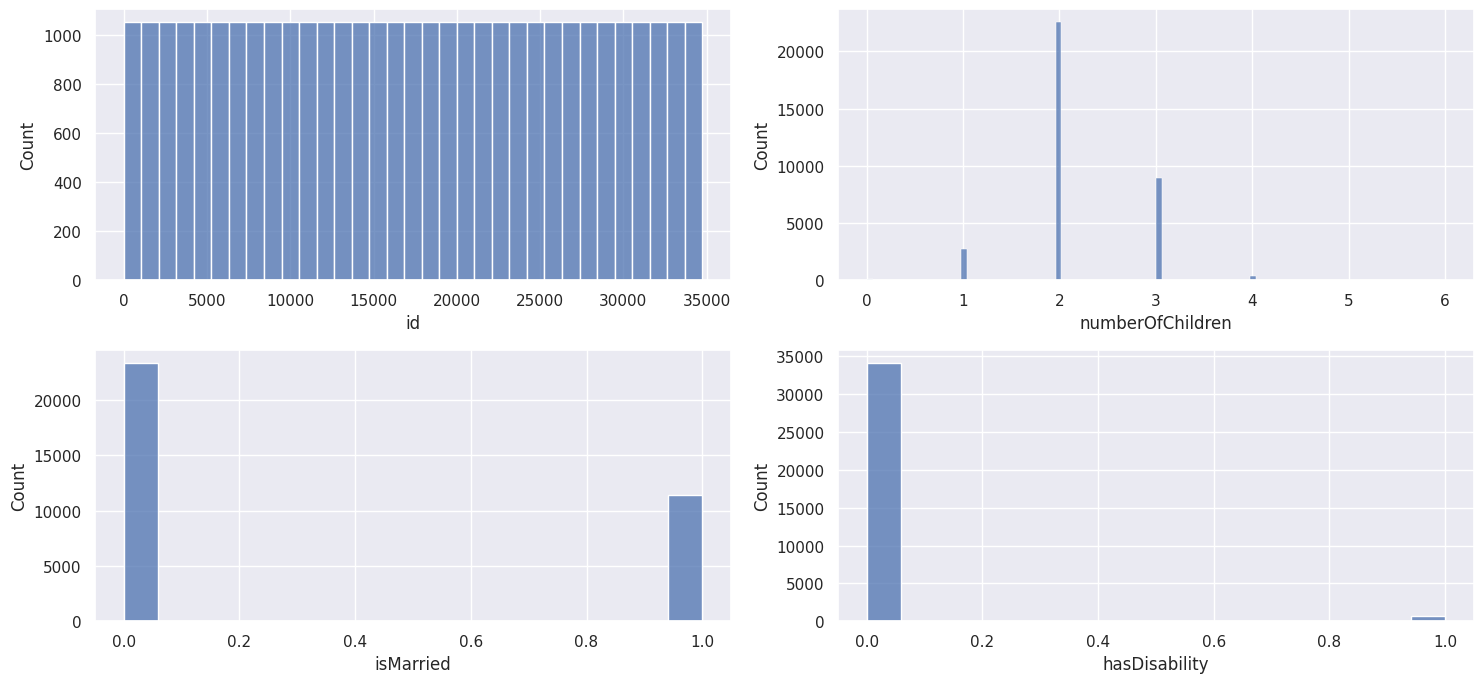

In [53]:
col_to_plot = df.select_dtypes(include='number').columns.tolist()
f, axes = plt.subplots(round(len(col_to_plot)/2),2, figsize=(15, 7))
for i,x in zip(col_to_plot,axes.flat):
    sns.histplot(data = df ,x = str(i) ,ax = x  ,palette="muted")
f.show()
plt.tight_layout()

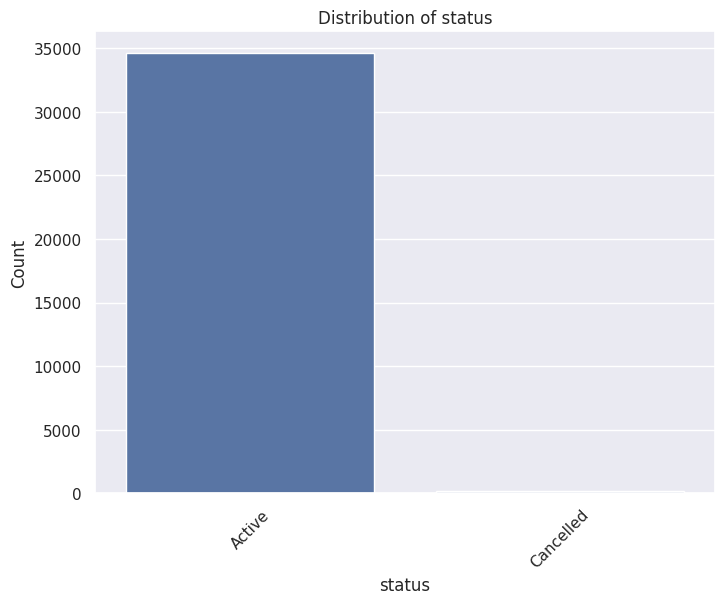

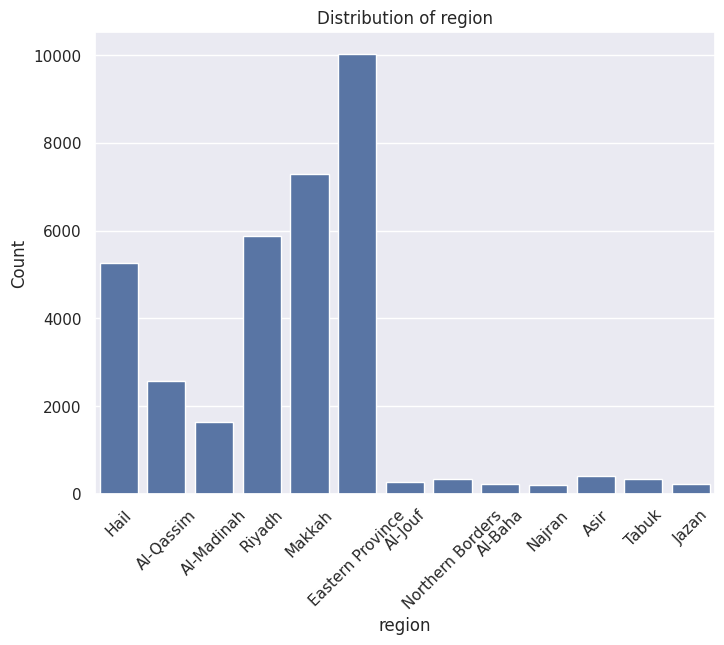

In [54]:
categorical_variables = ['status', 'region']
for var in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=var)
    plt.title('Distribution of ' + var)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

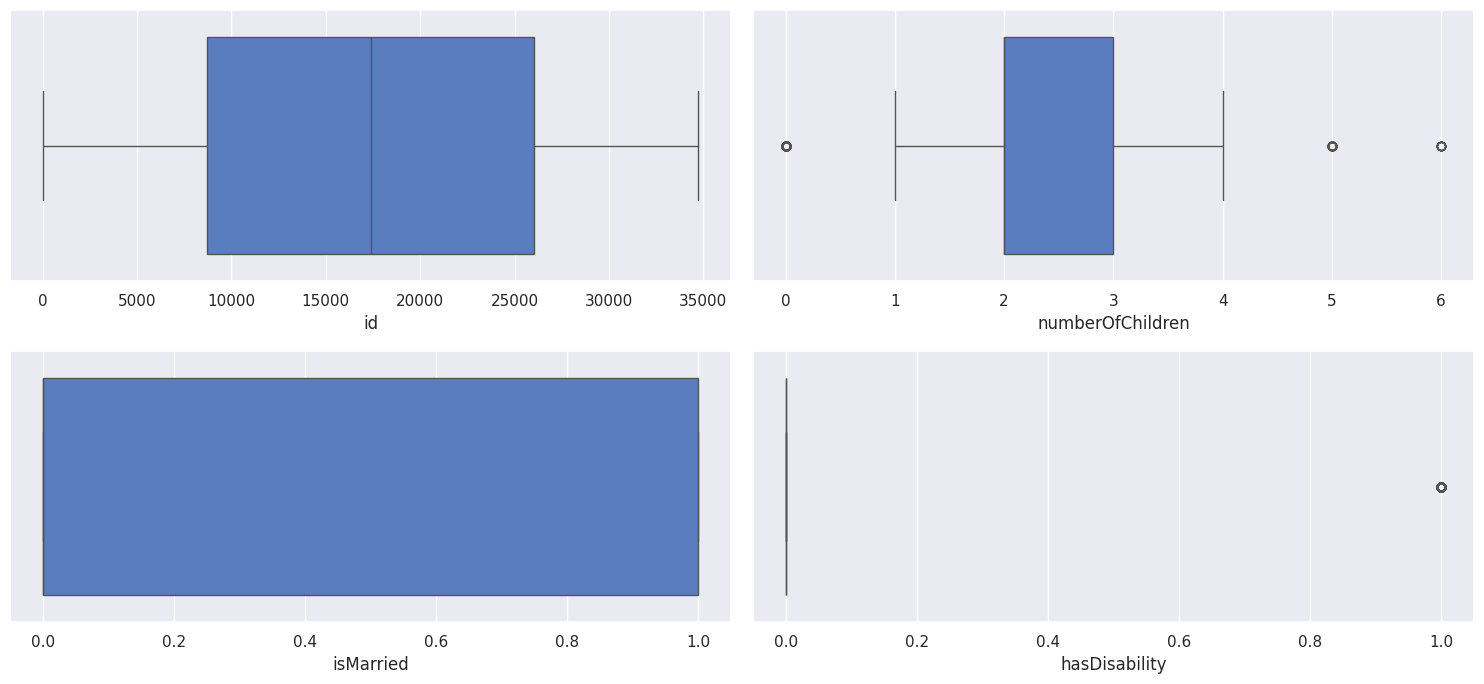

In [55]:
# Another visual to see outliers
col_to_plot = df.select_dtypes(include='number').columns.tolist()
f, axes = plt.subplots(round(len(col_to_plot)/2),2, figsize=(15, 7))
for i,x in zip(col_to_plot,axes.flat):
    sns.boxplot(data = df ,x = str(i) ,ax = x  ,palette="muted")
f.show()
plt.tight_layout()

## **Question 2:** What is the highest  value of numberOfChildren?


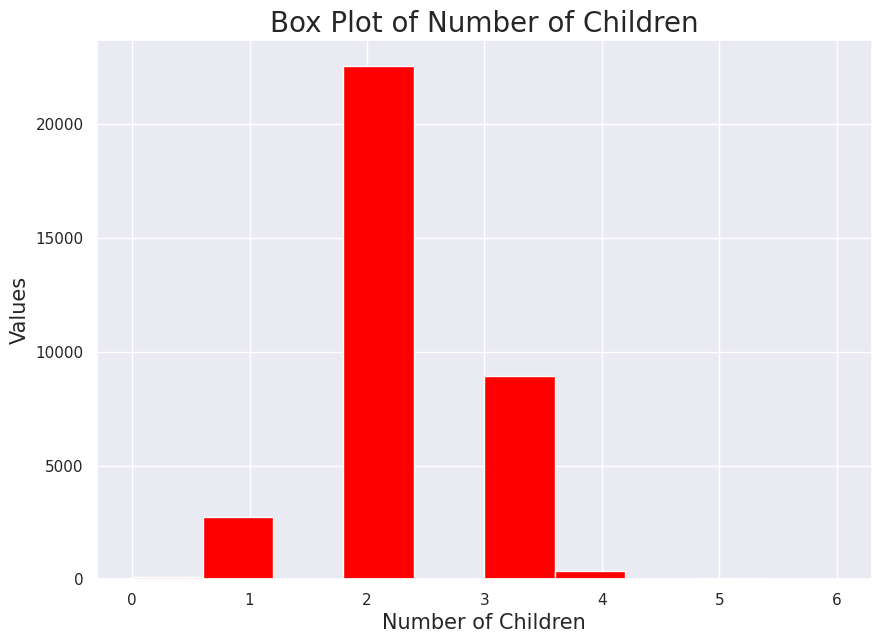

In [61]:
sns.set(rc={'figure.figsize':(10,7)})
plt.hist(df.numberOfChildren ,color='red'	)
plt.xlabel('Number of Children',fontsize=15,)
plt.ylabel('Values',fontsize=15)
plt.title('Box Plot of Number of Children',fontsize=20);

##generate a grid of scatterplots for  pairs


## **Additional Tools for Analysis**

In [ ]:
!pip install ydata-profiling